<h1 align="center">MSIN0143: Programming for Business Analytics</h1>
<h1 align="center">Group Coursework</h1>
<h1 align="center">Uber Trips in London</h1>
<br><br><br>
<h3 align="center">Word Count: 1902 (Excluding Table of Contents and References)</h3>
 <h3 align="center">December 2020</h3>

<h3>Table of Contents</h3>

* [1. Introduction](#1.-Introduction)
    * [1.1 Business Problem](#1.1-Business-Problem)
    * [1.2 Objective](#1.2-Objective)
* [2. Explore the Datasets](#2.-Explore-the-Datasets)
    * [2.1 Uber Movement Data](#2.1-Uber-Movement-Data)
    * [2.2 Meteostat Data](#2.2-Meteostat-Data)
* [3. Data Cleaning & Preparation](#3.-Data-Cleaning-&-Preparation)
    * [3.1 Part 1: Uber Movement Data Cleaning](#3.1-Part-1:-Uber-Movement-Data-Cleaning)
    * [3.2 Part 2: Meteostat Data Cleaning](#3.2-Part-2:-Meteostat-Data-Cleaning)
    * [3.3 Part 3: Merging DataFrames](#3.3-Part-3:-Merging-DataFrames)
    * [3.4 Part 4: Aggregated DataFrame](#3.4-Part-4:-Aggregated-DataFrame)
    * [3.5 Exploring DataFrames](#3.5-Exploring-DataFrames)    
* [4. Descriptive Analytics](#4.-Descriptive-Analytics)
    * [4.1 Distribution of Varibles](#4.1-Distribution-of-Variables)
    * [4.2 Correlation Between Variables](#4.2-Correlation-Between-Variables)    
* [5. Regression](#5.-OLS-Regression)
    * [5.1 OLS Regression](#5.1-OLS-Regression)
    * [5.2 Panel Regression](#5.2-Panel-Regression)
* [6. SARIMA Model](#6.-SARIMA-Model)
    * [6.1 Plotting the Datasets](#6.1-Plotting-the-Datasets)
    * [6.2 Plotting the ACF and PACF](#6.2-Plotting-the-ACF-and-PACF)
    * [6.3 Selecting the Appropriate Order (p,q,P,Q) of a SARIMA Model](#6.3-Selecting-the-Appropriate-Order-(p,q,P,Q)-of-a-SARIMA-Model)
    * [6.4 Estimating the Best Model](#6.4-Estimating-the-Best-Model)
    * [6.5 Diagnosing the Model Residuals](#6.5-Diagnosing-the-Model-Residuals)
    * [6.6 Plotting the Predictions of the Models and Forecasting](#6.6-Plotting-the-Predictions-of-the-Models-and-Forecasting)
    * [6.7 Is the Best-Fitted Model the Best Model?](#6.7-Is-the-Best-Fitted-Model-the-Best-Model?)
* [7. Conclusion](#7.-Conclusion)
* [References](#References)

# 1. Introduction

### 1.1 Business Problem

Uber is an American multinational company offering cars for hire and various other services. Uber has been operating in London since 2012. Uber’s competitive pricing strategy is based on supply and demand. If there is a high demand in a specific area in a specific time, and a lower supply of cars on the road, price may increase (also known as Uber Surge Pricing). Uber has recently updated its fare policy to a fixed-rate model, called Upfront Pricing, which takes into account  expected duration and distance of the trip. There are multiple factors that affect Uber’s fares, such as heavy traffic or bad weather that extend the distance or duration of the ride, which in turn will be reflected by fare estimates. 

We will be conducting research on trip duration and weather data for the city of London. London is a well-connected city with many train stations connecting to the rest of Britain as well as into parts of Europe, namely through its King’s Cross St. Pancras station. For the purposes of this analysis, the chosen route is from the origin as King’s Cross St. Pancras station to the destination of Westminster; as it is the most popular route from the busy station. Implications of weather effects on trip duration would be shown in order to explore the impact of anticipated weather patterns on the expected duration of the trip, which may in turn affect customers' fares.

### 1.2 Objectives
Goals of the research are to:
(i) explore variations in trip durations, 
(ii) analyse weather factors affect trip duration, and 
(iii) consider seasonal patterns in the variation of trip duration. 

# 2. Explore the Datasets

Dataset we will use for our analyses are derived from two databases: Uber Movement (https://movement.uber.com/?lang=en-GB) and Meteostat (https://meteostat.net/en/place/GB-QK9E). We extracted relevant data corresponding to the location and time period we would like to focus on. Datasets are relatively clean, but need to be transformed to be more identical to each other, and  merged into one data frame. 

In [1]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge folium

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# addition
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# loading key libraries
import os
import glob
import pandas as pd
import time
import datetime
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from itertools import product
from datetime import datetime
from scipy import stats as st

import folium
from linearmodels import PanelOLS
from sklearn.linear_model import LinearRegression

### 2.1 Uber Movement Data

Raw data from Uber Movement includes quarterly reports of daily mean travel time across geographical areas in London. Downloaded data is saved under "combined_uber.csv", which contains data from January 2019 to March 2020 filtered to one route: King's Cross St. Pancras to Westminster.

In [4]:
# Uber Movement
# load dataset
uber_data = pd.read_csv("combined_uber.csv") 

# create dataframe for Uber
df_uber = pd.DataFrame(uber_data)

# first glance at dataset
df_uber.head()

,Date,Origin Movement ID,Destination Movement ID,AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Evening Mean Travel Time (Seconds),Early Morning Mean Travel Time (Seconds)
0,01/01/2019,517.0,364.0,898.0,1627.0,1372.0,1043.0,1155.0
1,01/02/2019,517.0,364.0,1094.0,1354.0,1387.0,1039.0,918.0
2,01/03/2019,517.0,364.0,1168.0,1352.0,1299.0,1032.0,732.0
3,01/04/2019,517.0,364.0,1158.0,1534.0,1272.0,1105.0,874.0
4,01/05/2019,517.0,364.0,838.0,1414.0,1333.0,1165.0,874.0


In [5]:
# show list of variables, number of observations per variable and datatype of each variable 
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      455 non-null    object 
 1   Origin Movement ID                        455 non-null    float64
 2   Destination Movement ID                   455 non-null    float64
 3   AM Mean Travel Time (Seconds)             453 non-null    float64
 4   PM Mean Travel Time (Seconds)             455 non-null    float64
 5   Midday Mean Travel Time (Seconds)         455 non-null    float64
 6   Evening Mean Travel Time (Seconds)        454 non-null    float64
 7   Early Morning Mean Travel Time (Seconds)  451 non-null    float64
dtypes: float64(7), object(1)
memory usage: 35.9+ KB


In [6]:
# variable descriptions provided by Uber Movement 

# Date: International Date and Hour (US Date Format) 
# Origin Movement ID: Unique Code for Origin
# Destination Movement ID: Unique Code for Destination 
# AM Mean Travel Time (Seconds): Travel Time from 7am to 10am       
# PM Mean Travel Time (Seconds): Travel Time from 4pm to 7pm          
# Midday Mean Travel Time (Seconds): Travel Time from 10am to 4pm        
# Evening Mean Travel Time (Seconds): Travel time from 7pm to 12am      
# Early Morning Mean Travel Time (Seconds): Travel Time from 12am to 7am 

### 2.2 Meteostat Data

Raw data from Meteostat includes historical hourly weather and climate data in London. Downloaded data is saved under "combined_weather.csv", which contains data from January 2019 to March 2020. 

In [7]:
# Meteostat
# load dataset
weather_data = pd.read_csv("combined_weather.csv") 

# create dataframe for weather
df_weather = pd.DataFrame(weather_data)

# first glance at dataset
df_weather.head()

,time,time_local,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,30/04/2019 23:00,01/05/2019 00:00,8.1,5.7,85,0.0,NaN,149,7,15,1021.4,NaN,3
1,01/05/2019 00:00,01/05/2019 01:00,7.5,5.8,89,0.0,NaN,152,6,13,1021.8,NaN,3
2,01/05/2019 01:00,01/05/2019 02:00,7.2,5.7,90,0.0,NaN,160,6,13,1021.1,NaN,3
3,01/05/2019 02:00,01/05/2019 03:00,6.9,5.4,90,0.0,NaN,155,6,13,1020.5,NaN,3
4,01/05/2019 03:00,01/05/2019 04:00,6.5,5.1,91,0.0,NaN,169,6,11,1020.3,NaN,3


In [8]:
# show list of variables, number of observations per variable and datatype of each variable 
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10940 entries, 0 to 10939
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        10940 non-null  object 
 1   time_local  10940 non-null  object 
 2   temp        10940 non-null  float64
 3   dwpt        10940 non-null  float64
 4   rhum        10940 non-null  int64  
 5   prcp        10940 non-null  float64
 6   snow        16 non-null     float64
 7   wdir        10940 non-null  int64  
 8   wspd        10940 non-null  int64  
 9   wpgt        10940 non-null  int64  
 10  pres        10940 non-null  float64
 11  tsun        9 non-null      float64
 12  coco        10940 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 1.1+ MB


In [9]:
# variable descriptions are provided by MeteoStat 

# time: International Date and Hour
# local time: Local Date and Hour 
# temp: Temperature in Celsius
# dwpt: Temperature Dew Point
# rhum: Humidity Percentage
# prcp: Precipitation (water from rain in mm)
# snow: Snow Depth
# wdir: Wind Direction
# wspd: Wind Speed (in km/h)
# wpgt: Wind Peak Gust (in km/h)
# pres: Atmospheric Pressure (in hPa) 
# tsun: Tsunami Indicator
# coco: Condition Code

# 3. Data Cleaning and Preparation

In this section, Uber Movement and MeteoStat data are cleaned, transformed, and merged to prepare the data for further analyses. 

### 3.1 Part 1: Uber Movement Data Cleaning

In [10]:
# Uber Movement
# load Uber data containing observations from January 2019 - March 2020
df_uber.head()

,Date,Origin Movement ID,Destination Movement ID,AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Evening Mean Travel Time (Seconds),Early Morning Mean Travel Time (Seconds)
0,01/01/2019,517.0,364.0,898.0,1627.0,1372.0,1043.0,1155.0
1,01/02/2019,517.0,364.0,1094.0,1354.0,1387.0,1039.0,918.0
2,01/03/2019,517.0,364.0,1168.0,1352.0,1299.0,1032.0,732.0
3,01/04/2019,517.0,364.0,1158.0,1534.0,1272.0,1105.0,874.0
4,01/05/2019,517.0,364.0,838.0,1414.0,1333.0,1165.0,874.0


In [11]:
# check for missing values 
df_uber.isnull().values.any()

True

In [12]:
# replace missing daily mean travel time values with average travel time 
df_uber=df_uber.dropna(how='all')
df_uber.fillna(df_uber.mean(), inplace=True)

In [13]:
# pivot data  
df_uber = df_uber.melt(id_vars=["Date","Origin Movement ID","Destination Movement ID"], 
        var_name="Time", 
        value_name="Mean-Travel")

In [14]:
# clean columns 
df_uber['Date'] = pd.to_datetime(df_uber['Date'], format = '%m/%d/%Y')
df_uber[['Time Bracket','delete','delete2','delete3','delete4', 'delete5']] = df_uber.Time.str.split(" ",expand=True,)
keep_col2 = ["Date","Origin Movement ID","Destination Movement ID", "Time Bracket", "Mean-Travel"]
df_uber = df_uber[keep_col2]
df_uber = df_uber.rename(columns={"Mean-Travel": "Mean Travel Time"})

df_uber.head()

,Date,Origin Movement ID,Destination Movement ID,Time Bracket,Mean Travel Time
0,2019-01-01,517.0,364.0,AM,898.0
1,2019-01-02,517.0,364.0,AM,1094.0
2,2019-01-03,517.0,364.0,AM,1168.0
3,2019-01-04,517.0,364.0,AM,1158.0
4,2019-01-05,517.0,364.0,AM,838.0


### 3.2 Part 2: Meteostat Data Cleaning

In [15]:
# Meteostat
# load weather data containing observations from January 2019 - March 2020
df_weather.head() #NaN observed in "snow" and "tsun"

,time,time_local,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,30/04/2019 23:00,01/05/2019 00:00,8.1,5.7,85,0.0,NaN,149,7,15,1021.4,NaN,3
1,01/05/2019 00:00,01/05/2019 01:00,7.5,5.8,89,0.0,NaN,152,6,13,1021.8,NaN,3
2,01/05/2019 01:00,01/05/2019 02:00,7.2,5.7,90,0.0,NaN,160,6,13,1021.1,NaN,3
3,01/05/2019 02:00,01/05/2019 03:00,6.9,5.4,90,0.0,NaN,155,6,13,1020.5,NaN,3
4,01/05/2019 03:00,01/05/2019 04:00,6.5,5.1,91,0.0,NaN,169,6,11,1020.3,NaN,3


In [16]:
# keep relevant columns; time, temp, rhum, prcp, snow, wspd
# drop irrelevant columns; "tsun" variable is dropped as it is intuitively irrelevant in London area
    # "time_local" variable is dropped to avoid time-zone inaccuracies;
    # "coco" variable is dropped because it is redundant 
    # "wdir" and "dwpt" are dropped because we will not be using these variables in further analyses

keep_col = ['time','temp','rhum', 'prcp', 'snow', 'wspd'] 
df_weather = df_weather[keep_col] 

# NaN in snow caused by "no snow" - replace NaN with 0
df_weather['snow'] = df_weather['snow'].fillna(0) 

# create snow dummies to enable categorical representation of snow  
df_weather.loc[df_weather['snow'] > 0, 'snow'] = 1
df_weather.loc[df_weather['snow'] == 0, 'snow'] = 0

In [17]:
# create time brackets as per Uber data 
# create column for 'date' and 'hour' by splitting 'time'

df_weather[['date','hour']] = df_weather.time.str.split(" ",expand=True,)
df_weather[['just_hour','zeros']] = df_weather.hour.str.split(":",expand=True,)
df_weather[["hour_numeric"]] = df_weather[["just_hour"]].apply(pd.to_numeric)
df_weather["bracket"] = pd.cut(x=df_weather['hour_numeric'], bins = [-1, 7, 10, 16, 19, 23], labels = ['Early', 'AM', 'Midday', 'PM', 'Evening'])

#re-clean columns 
df_weather = df_weather.drop(columns = ["time", "hour", "just_hour", "zeros", "hour_numeric"])
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%d/%m/%Y')

In [18]:
# aggregate means based on 'date' and 'bracket'

df_weather = df_weather.groupby(
   ['date', 'bracket']
).agg(
    {
         'temp':"mean",  
         'rhum': "mean", 
         'prcp': 'mean',
        'snow': "mean",
        'wspd':"mean"
    }
)

df_weather = df_weather.reset_index()

#rename columns to merge with Uber Movement data
df_weather = df_weather.rename(columns={"date": "Date", "bracket": "Time Bracket", "temp":"Temperature", "rhum":"Humidity", "prcp":"Precipitation", "wspd":"Wind Speed", "snow":"Snow"})

In [19]:
# weather dataframe ready to be merged 
df_weather.head() 

,Date,Time Bracket,Temperature,Humidity,Precipitation,Snow,Wind Speed
0,2019-01-01,Early,6.012500,86.625000,0.0,0.0,9.250000
1,2019-01-01,AM,6.900000,87.666667,0.0,0.0,11.000000
2,2019-01-01,Midday,9.766667,75.000000,0.0,0.0,13.666667
3,2019-01-01,PM,7.733333,74.666667,0.0,0.0,9.666667
4,2019-01-01,Evening,5.400000,78.500000,0.0,0.0,8.000000


### 3.3 Part 3: Merging DataFrames

In [20]:
# merge Uber and Weather data to obtain dataset 'df'
df = pd.merge(df_uber, df_weather, how = 'inner')

In [21]:
# clean columns 
df['Day of Week'] = df['Date'].dt.day_name() #add day of week 
df = df.round(2) #round to 2 decimal points

# view merged dataframe 
df.head()

,Date,Origin Movement ID,Destination Movement ID,Time Bracket,Mean Travel Time,Temperature,Humidity,Precipitation,Snow,Wind Speed,Day of Week
0,2019-01-01,517.0,364.0,AM,898.0,6.90,87.67,0.0,0.0,11.00,Tuesday
1,2019-01-02,517.0,364.0,AM,1094.0,2.93,79.67,0.0,0.0,7.00,Wednesday
2,2019-01-03,517.0,364.0,AM,1168.0,1.80,89.67,0.0,0.0,5.33,Thursday
3,2019-01-04,517.0,364.0,AM,1158.0,-1.13,93.00,0.0,0.0,4.00,Friday
4,2019-01-05,517.0,364.0,AM,838.0,0.53,92.67,0.0,0.0,7.00,Saturday


### 3.4 Part 4: Aggregated DataFrame

In [22]:
# for SARIMA model: time series require consistent intervals 
# previous dataset "df" was aggregated to obtain daily means of observations in dataframe "df_daily"

In [23]:
df_daily = df 

df_daily = df_daily.groupby(
   ['Date',]
).agg(
    {
         'Temperature':"mean",  
         'Humidity': "mean", 
         'Precipitation': 'mean',
        'Snow': "mean",
        'Wind Speed':"mean",
        'Mean Travel Time': "mean"
    }
)

df_daily = df_daily.reset_index()
df_daily.head()

,Date,Temperature,Humidity,Precipitation,Snow,Wind Speed,Mean Travel Time
0,2019-01-01,7.162,80.492,0.0,0.0,10.318,1219.0
1,2019-01-02,3.536,78.816,0.0,0.0,7.150,1158.4
2,2019-01-03,2.036,85.894,0.0,0.0,5.134,1116.6
3,2019-01-04,0.368,86.800,0.0,0.0,5.618,1188.6
4,2019-01-05,2.394,85.352,0.0,0.0,7.776,1124.8


In [24]:
# Both dataframes "df" and "df_daily" will be used in further analyses

### 3.5 Exploring DataFrames

With the two dataframes prepared for further analyses, this section will provide an overview of variables included in the two dataframes, and review its attributes and characteristics.

In [25]:
#variable overview for main dataframe "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2274
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     2275 non-null   datetime64[ns]
 1   Origin Movement ID       2275 non-null   float64       
 2   Destination Movement ID  2275 non-null   float64       
 3   Time Bracket             2275 non-null   object        
 4   Mean Travel Time         2275 non-null   float64       
 5   Temperature              2275 non-null   float64       
 6   Humidity                 2275 non-null   float64       
 7   Precipitation            2275 non-null   float64       
 8   Snow                     2275 non-null   float64       
 9   Wind Speed               2275 non-null   float64       
 10  Day of Week              2275 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 213.3+ KB


In [26]:
#variable overview for aggregated dataframe "df_daily"
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              455 non-null    datetime64[ns]
 1   Temperature       455 non-null    float64       
 2   Humidity          455 non-null    float64       
 3   Precipitation     455 non-null    float64       
 4   Snow              455 non-null    float64       
 5   Wind Speed        455 non-null    float64       
 6   Mean Travel Time  455 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 25.0 KB


In [27]:
# variables in both dataframes refer to the same descriptions; 
# df_daily contains less observations as it is an aggregate of the main dataframe

# variable descriptions for "df" and "df_daily"

# Date: International Date (in pandas datetime format)
# Temperature: Temperature in Celsius
# Humidity: Humidity Percentage
# Precipitation: Precipitation (water from rain in mm)
# Snow: Snow Indicator (dummy variable 1 = snow, 0 = no snow)
# Wind Speed: Wind Speed (in km/h)
# Mean Travel Time: Mean Travel Time of Uber trip from King's Cross St. Pancras to Westminster

# additional variables in "df"

# Origin Movement ID: Unique Code for Origin
# Destination Movement ID: Unique Code for Destination 
# Time Bracket: Time Bracket according to Uber Movement (AM, PM, Midday, Evening, Early Morning)
# Day of Week: Day of Week Respective to the Date

In [28]:
# descriptive statistics of the dataframe "df", which contains all observations in "df_daily"
df.describe()

,Origin Movement ID,Destination Movement ID,Mean Travel Time,Temperature,Humidity,Precipitation,Snow,Wind Speed
count,2275.0,2275.0,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000
mean,517.0,364.0,1357.070004,10.108048,78.556585,0.085165,0.001279,14.884207
std,0.0,0.0,352.620559,5.520124,13.713224,0.244046,0.031641,7.390085
min,517.0,364.0,705.000000,-2.160000,35.330000,0.000000,0.000000,2.750000
25%,517.0,364.0,1017.000000,6.020000,70.330000,0.000000,0.000000,9.000000
50%,517.0,364.0,1357.000000,9.230000,81.670000,0.000000,0.000000,13.500000
75%,517.0,364.0,1629.500000,13.880000,89.670000,0.020000,0.000000,19.145000
max,517.0,364.0,2440.000000,33.630000,100.000000,2.700000,1.000000,56.830000


# 4. Descriptive Analytics

### 4.1 Map of Route

In [29]:
InteractiveShell.ast_node_interactivity = 'last_expr'

In [30]:
# plottting our route of interest from Kings Cross to Westminster
# using the coordinates (51.5323954, -0.1230224) and (51.49751, -0.13566)

m=folium.Map(location = [51.49751, -0.13566],zoom_start=13) 

#plotting a marker at Kings Cross
folium.Marker([51.5323954, -0.1230224], popup='Kings Cross').add_to(m) 
#plotting a marker at Westminster
folium.Marker([51.49751,-0.13566], popup='Westminster').add_to(m) 

#drawing a line between the destinations
folium.PolyLine(locations = [(51.5323954, -0.1230224), (51.49751,-0.13566)], 
                line_opacity = 0.5).add_to(m) 

#displaying map
m

### 4.2 Distribution of Variables

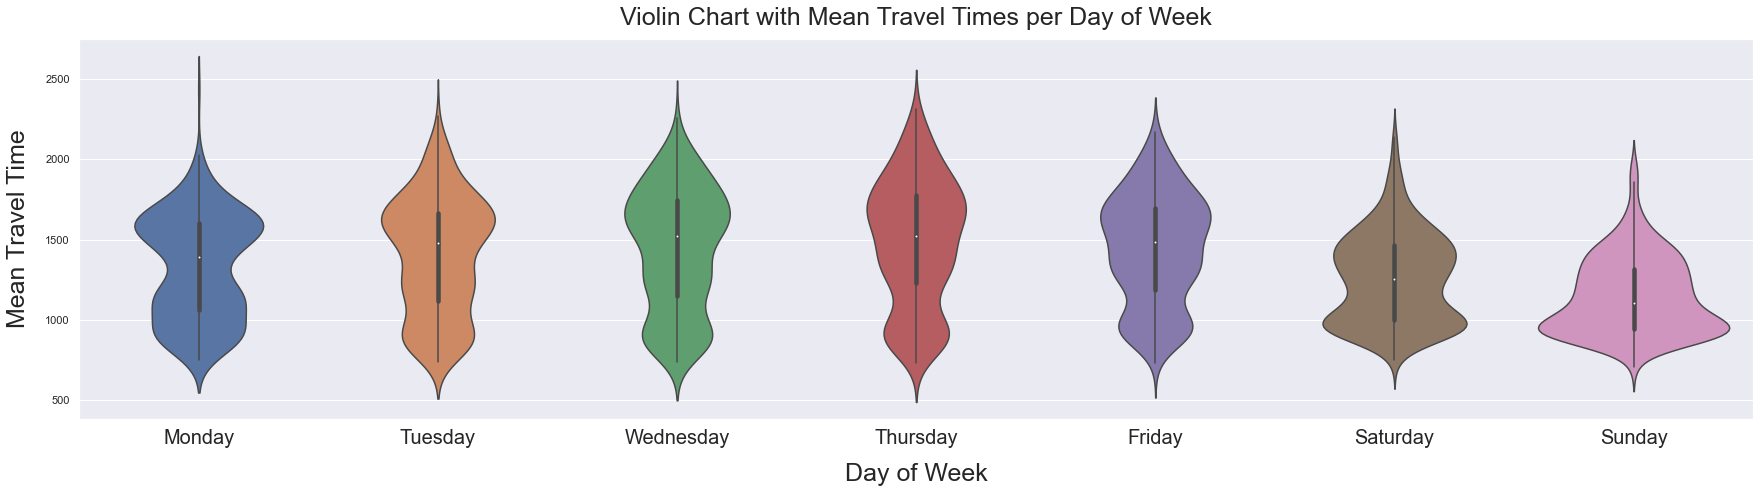

In [31]:
# create violin chart to see the distribution and density of the trip duration per day

# enlarging the graph
plt.figure(figsize = (30,7))

# formatting the graph 
sns.set(rc={'font.size': 35, 'axes.titlesize': 35, 'axes.labelsize':35})

# setting the axes and ordering days of the week 
x=sns.violinplot(x='Day of Week', y='Mean Travel Time', data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# adding title, axes labels and font size
plt.title('Violin Chart with Mean Travel Times per Day of Week', fontsize = 25).set_position([.5, 1.02])
plt.xlabel('Day of Week', fontsize = 25, labelpad=15)
plt.ylabel('Mean Travel Time', fontsize = 25, labelpad=15)
x.set_xticklabels(x.get_xticklabels(), rotation=0, fontsize=20)

# display graph
plt.show()

Mean travel time is highest in weekdays and lower in weekends. The distribution of mean travel times also varies between weekdays and weekends; where the range is higher during weekdays, and the distribution is more negatively skewed during weekends. 

Text(0.5, 0, 'Time Bracket')

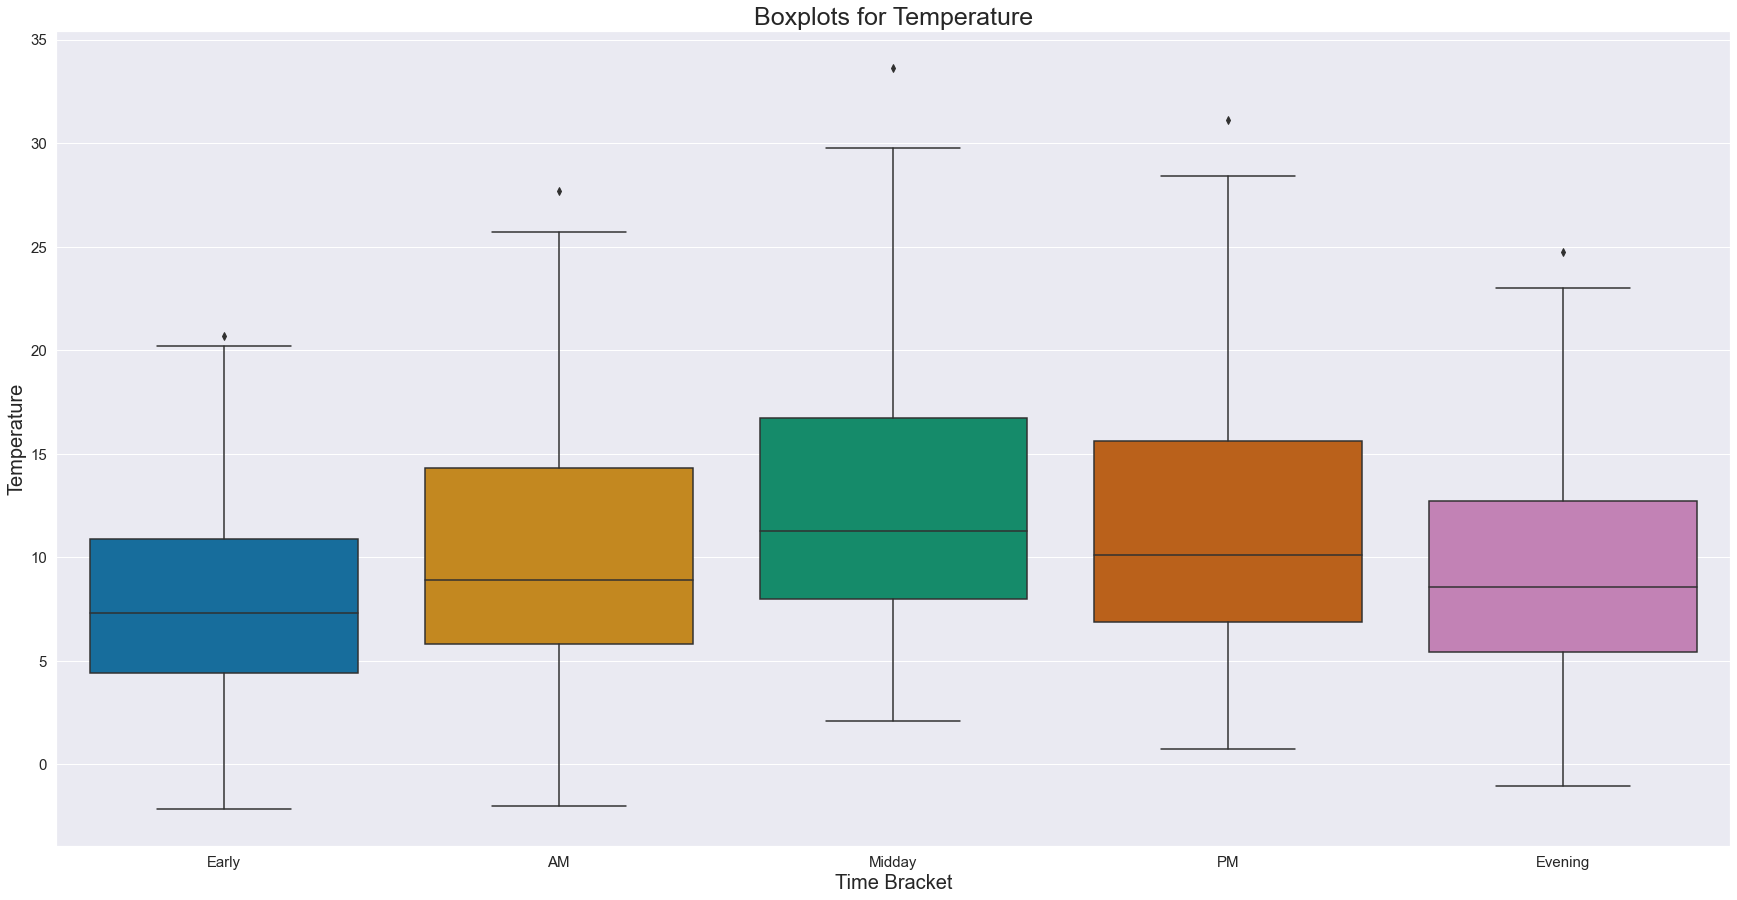

In [32]:
# make a boxplot of how well temperature is distributed in the dataset

# enlarging the graph
plt.figure(figsize = (30,15))

a = sns.boxplot(y='Temperature', x='Time Bracket', 
                 data=df,    
                 palette="colorblind",order=["Early", "AM", "Midday", "PM", "Evening"]) 

# The box plot represents the distribution of temperatures in each of the time brackets during the day

# changing graph title
a.axes.set_title("Boxplots for Temperature",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# adding axes labels
a.set_ylabel("Temperature",fontsize=20)
a.set_xlabel("Time Bracket",fontsize=20)



Boxplot shows that temperature is the highest during midday and lowest in early morning.

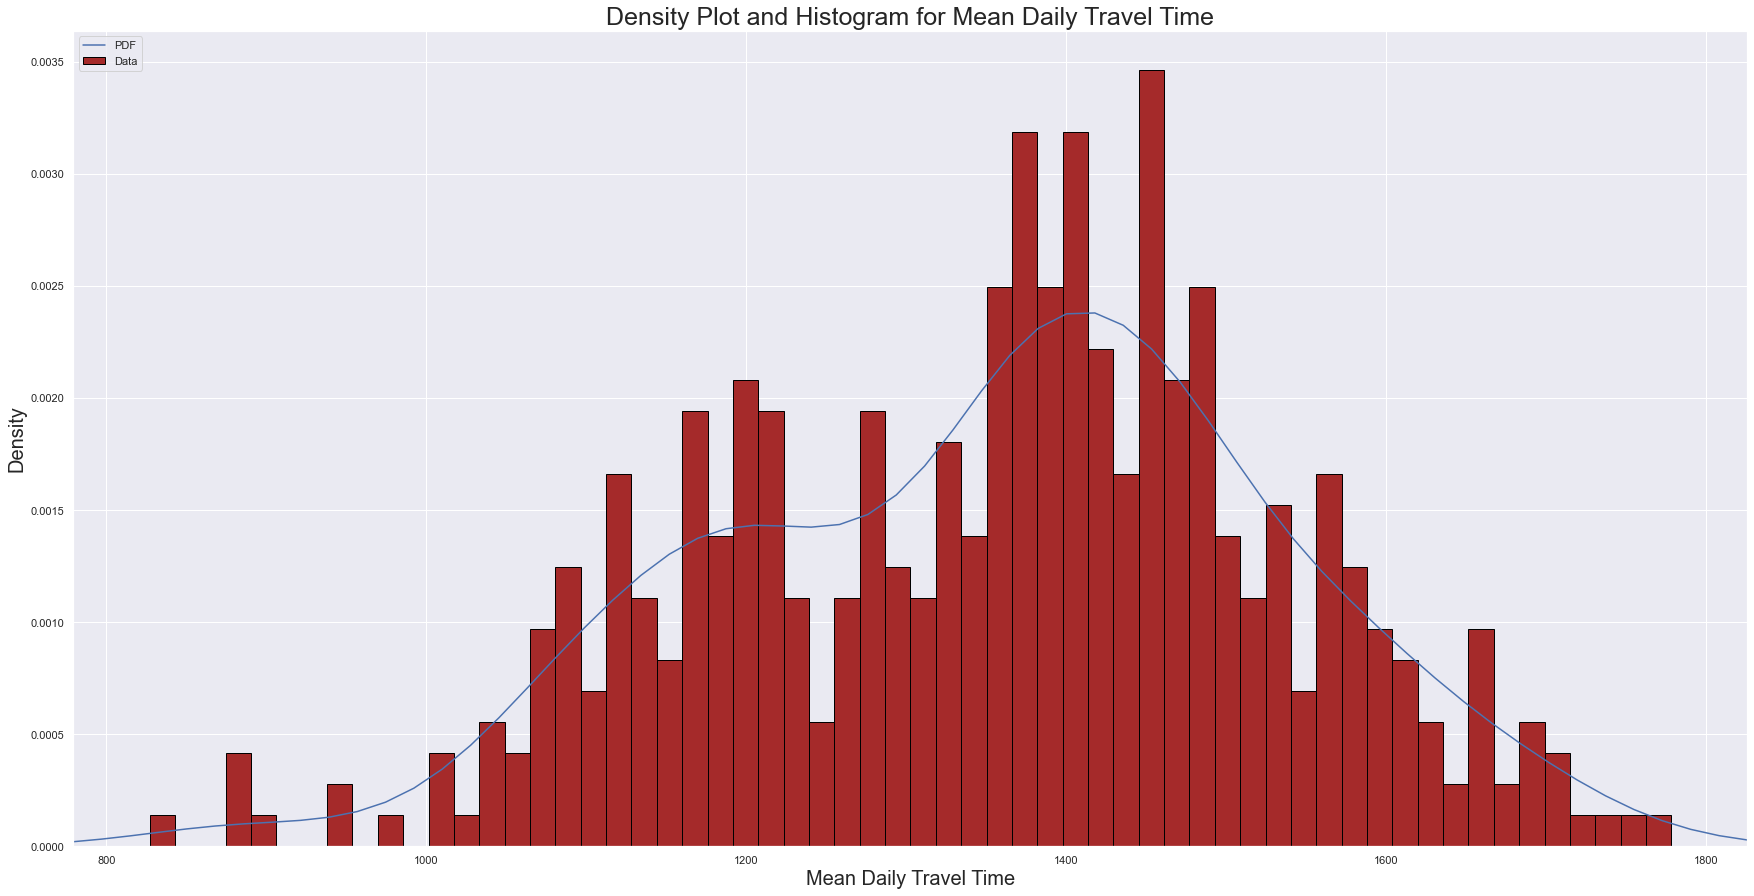

In [33]:
# make a histogram which shows that the distribution of the mean daily travel time
meanTT=df_daily['Mean Travel Time']
# enlarging the graph
plt.figure(figsize = (30,15))

# plotting the density plot and histogram
plt.hist(meanTT, density=True, label="Data",bins = int(60),color = 'brown', edgecolor = 'black')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 60) # 60 equal sized bins 
kde = st.gaussian_kde(meanTT)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")

# adding axes labels
plt.ylabel('Density', fontsize=20)
plt.xlabel('Mean Daily Travel Time', fontsize =20)
plt.title("Density Plot and Histogram for Mean Daily Travel Time", fontsize=25);

Distribution peaks between the interval of 1400-1500 seconds per trip.

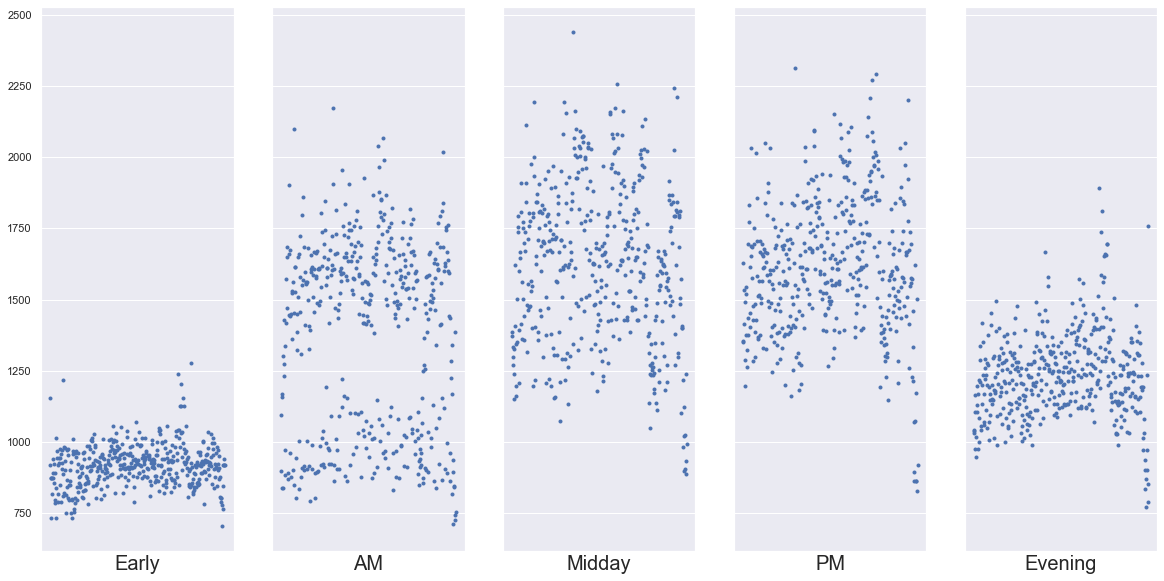

In [34]:
# create a scatter plot to see the pattern of mean travel in different time brackets  
 
# This shows that mean travel time on this route are quite different by time of day.

x1 = df[df['Time Bracket']=='Early']['Date']
y1 = df[df['Time Bracket']=='Early']['Mean Travel Time']

x2 = df[df['Time Bracket']=='AM']['Date']
y2 = df[df['Time Bracket']=='AM']['Mean Travel Time']

x3 = df[df['Time Bracket']=='Midday']['Date']
y3 = df[df['Time Bracket']=='Midday']['Mean Travel Time']

x4 = df[df['Time Bracket']=='PM']['Date']
y4 = df[df['Time Bracket']=='PM']['Mean Travel Time']

x5 = df[df['Time Bracket']=='Evening']['Date']
y5 = df[df['Time Bracket']=='Evening']['Mean Travel Time']

# enlarging the graph
plt.figure(figsize = (20,10))

# plot mean travel time in 'Early' time bracket
ax1 = plt.subplot(151)
plt.xticks([])
plt.xlabel('Early', fontsize=20)
plt.plot(x1, y1, linestyle = '', marker='.', alpha = 1)

# plot mean travel time in 'AM' time bracket
ax2 = plt.subplot(152, sharey = ax1)
plt.xticks([])
plt.yticks(color = 'w')
plt.xlabel('AM', fontsize=20)
plt.plot(x2, y2, linestyle = '', marker='.', alpha = 1)

# plot mean travel time in 'Midday' time bracket
ax3 = plt.subplot(153, sharey = ax1)
plt.xticks([])
plt.yticks(color = 'w')
plt.xlabel('Midday', fontsize=20)
plt.plot(x3, y3, linestyle = '', marker='.', alpha = 1)

# plot mean travel time in 'PM' time bracket
ax4 = plt.subplot(154, sharey = ax1)
plt.xticks([])
plt.yticks(color = 'w')
plt.xlabel('PM', fontsize=20)
plt.plot(x4, y4, linestyle = '', marker='.', alpha = 1)

# plot mean travel time in 'Evening' time bracket
ax5 = plt.subplot(155, sharey = ax1)
plt.xticks([])
plt.yticks(color = 'w')
plt.xlabel('Evening', fontsize=20)
plt.plot(x5, y5, linestyle = '', marker='.', alpha = 1)

# x axis shows time brackets
# y axis shows mean travel times

plt.show() # graph presents all the mean travel time on this route from 2019/01/01 to 2020/03/30 in five time brackets.

Mean travel time seems heavily concentrated in the 'Early' time bracket between the mean travel times of 750-1000 seconds, and in the evening between 1000-1500 seconds. During the day, travel times seem to be dispersed. 

This indicates that it might take about twice as long to travel in an uber from St. Pancras Station to Westminster in the daytime than in the evenings and nights. 

In [35]:
# add the dummy variable 'isweekday' - dummary variable with 0 means it is weekend and dummary variable with 1 means it is weekday
df['isweekday'] = np.where((df['Day of Week']=='Saturday') | (df['Day of Week']=='Sunday'), 0, 1)

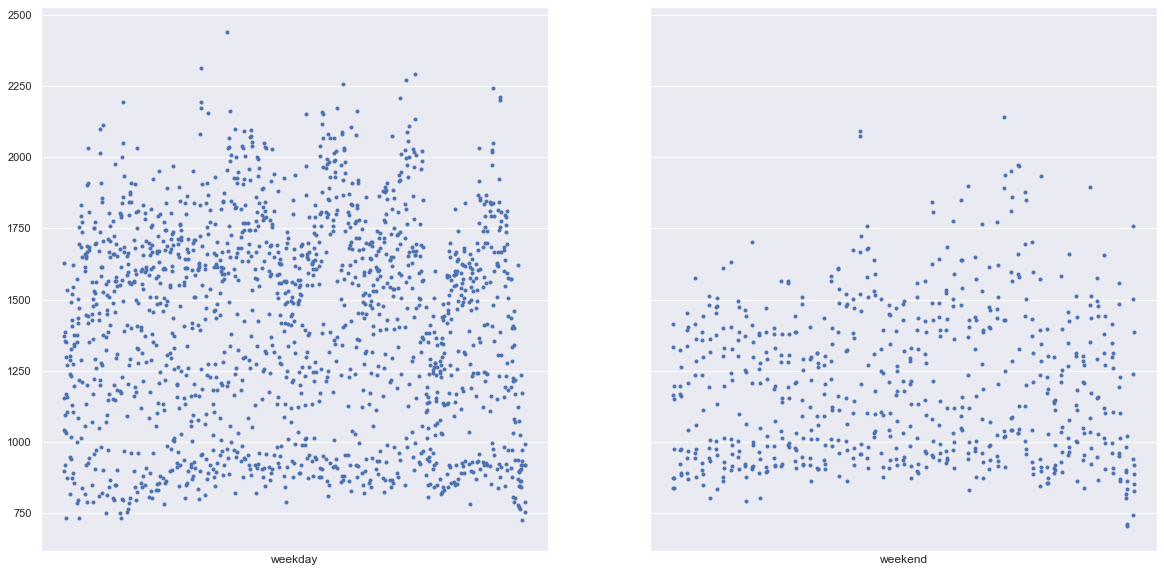

In [36]:
# create scatter plot of the distribution of mean travel times on weekdays and weekends

# enlarging the graph
plt.figure(figsize = (20,10))

x1 = df[df['isweekday']==1]['Date']
y1 = df[df['isweekday']==1]['Mean Travel Time']

x2 = df[df['isweekday']==0]['Date']
y2 = df[df['isweekday']==0]['Mean Travel Time']

# plot mean travel time in 'weekday' bracket
ax1 = plt.subplot(121)
plt.xticks([])
plt.xlabel('weekday', fontsize=12)
plt.plot(x1, y1, linestyle = '', marker='.', alpha = 1)

# plot mean travel time in 'weekend' bracket
ax2 = plt.subplot(122, sharey = ax1)
plt.xticks([])
plt.yticks(color = 'w')
plt.xlabel('weekend', fontsize=12)
plt.plot(x2, y2, linestyle = '', marker='.', alpha = 1)

# x axis shows weekday/weekend brackets
# y axis shows mean travel times

plt.show()

Minimum values are close but the maximums vary; mean travel time is more concentrated during weekends than on weekdays. Therefore, on average, it may take longer to travel on weekdays. 

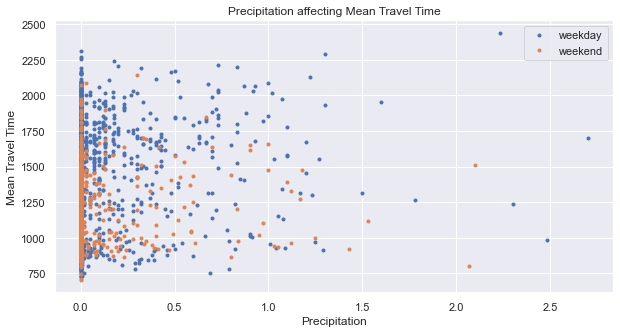

In [37]:
# create scatter plot controlling for precipitation to further explore the impact of weather
# enlarging the graph
plt.figure(figsize = (10,5))

x1 = df[df['isweekday']==1]['Precipitation']
y1 = df[df['isweekday']==1]['Mean Travel Time']

x2 = df[df['isweekday']==0]['Precipitation']
y2 = df[df['isweekday']==0]['Mean Travel Time']

plt.plot(x1, y1, linestyle = '', marker='.', alpha = 1, label = 'weekday')
plt.plot(x2, y2, linestyle = '', marker='.', alpha = 1, label = 'weekend')
plt.legend()

# adding axes labels
plt.ylabel('Mean Travel Time', fontsize=12)
plt.xlabel('Precipitation', fontsize =12)
plt.title("Precipitation affecting Mean Travel Time", fontsize=12);
plt.show()

When precipitation controlled, travel time is longer in weekdays than in weekends. There is also a slight tendency that mean travel time increases as precipitation increases. 

### 4.2 Correlation Between Variables

To observe effects weather variables on mean travel time, we view correlations between variables. 

In [38]:
# to look at the correlation between variables and Mean Travel Time 
corrMatrix=df.corr().drop(["Origin Movement ID", "Destination Movement ID"])
corrMatrix["Mean Travel Time"].sort_values(ascending=False)

Mean Travel Time    1.000000
Temperature         0.290469
isweekday           0.277726
Wind Speed          0.138614
Precipitation       0.084841
Snow               -0.013660
Humidity           -0.334099
Name: Mean Travel Time, dtype: float64

There are weak positive correlations between temperature and windspeed, and mean travel time, and a weak negative correlation between humidity and mean travel time. There is negligible correlation betweeen precipitation and snow, and mean travel time. 

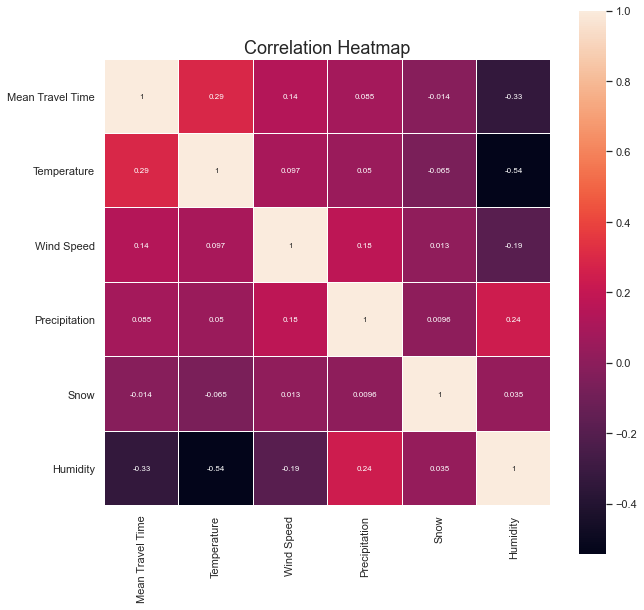

<Figure size 5040x4320 with 0 Axes>

In [39]:
# create correlation heatmap below to see the relationships between weather variables and mean travel time
# enlarging the graph
plt.figure(figsize = (10,10))

corrMatrix= df[['Mean Travel Time','Temperature','Wind Speed','Precipitation','Snow','Humidity']].corr()
t=sns.heatmap(corrMatrix, square=True,linewidths=0.1, annot=True, annot_kws={"size":8}) #Plot the correlation as heat map
ax=plt.axes()
ax.set_title('Correlation Heatmap', fontsize=18)
plt.show()
plt.figure(figsize = (70,60))
sns.set(rc={'font.size': 35, 'axes.titlesize': 35, 'axes.labelsize':35})

There is a moderately negative correlation between temperature and humidity whilst weeak correlation for other variables.

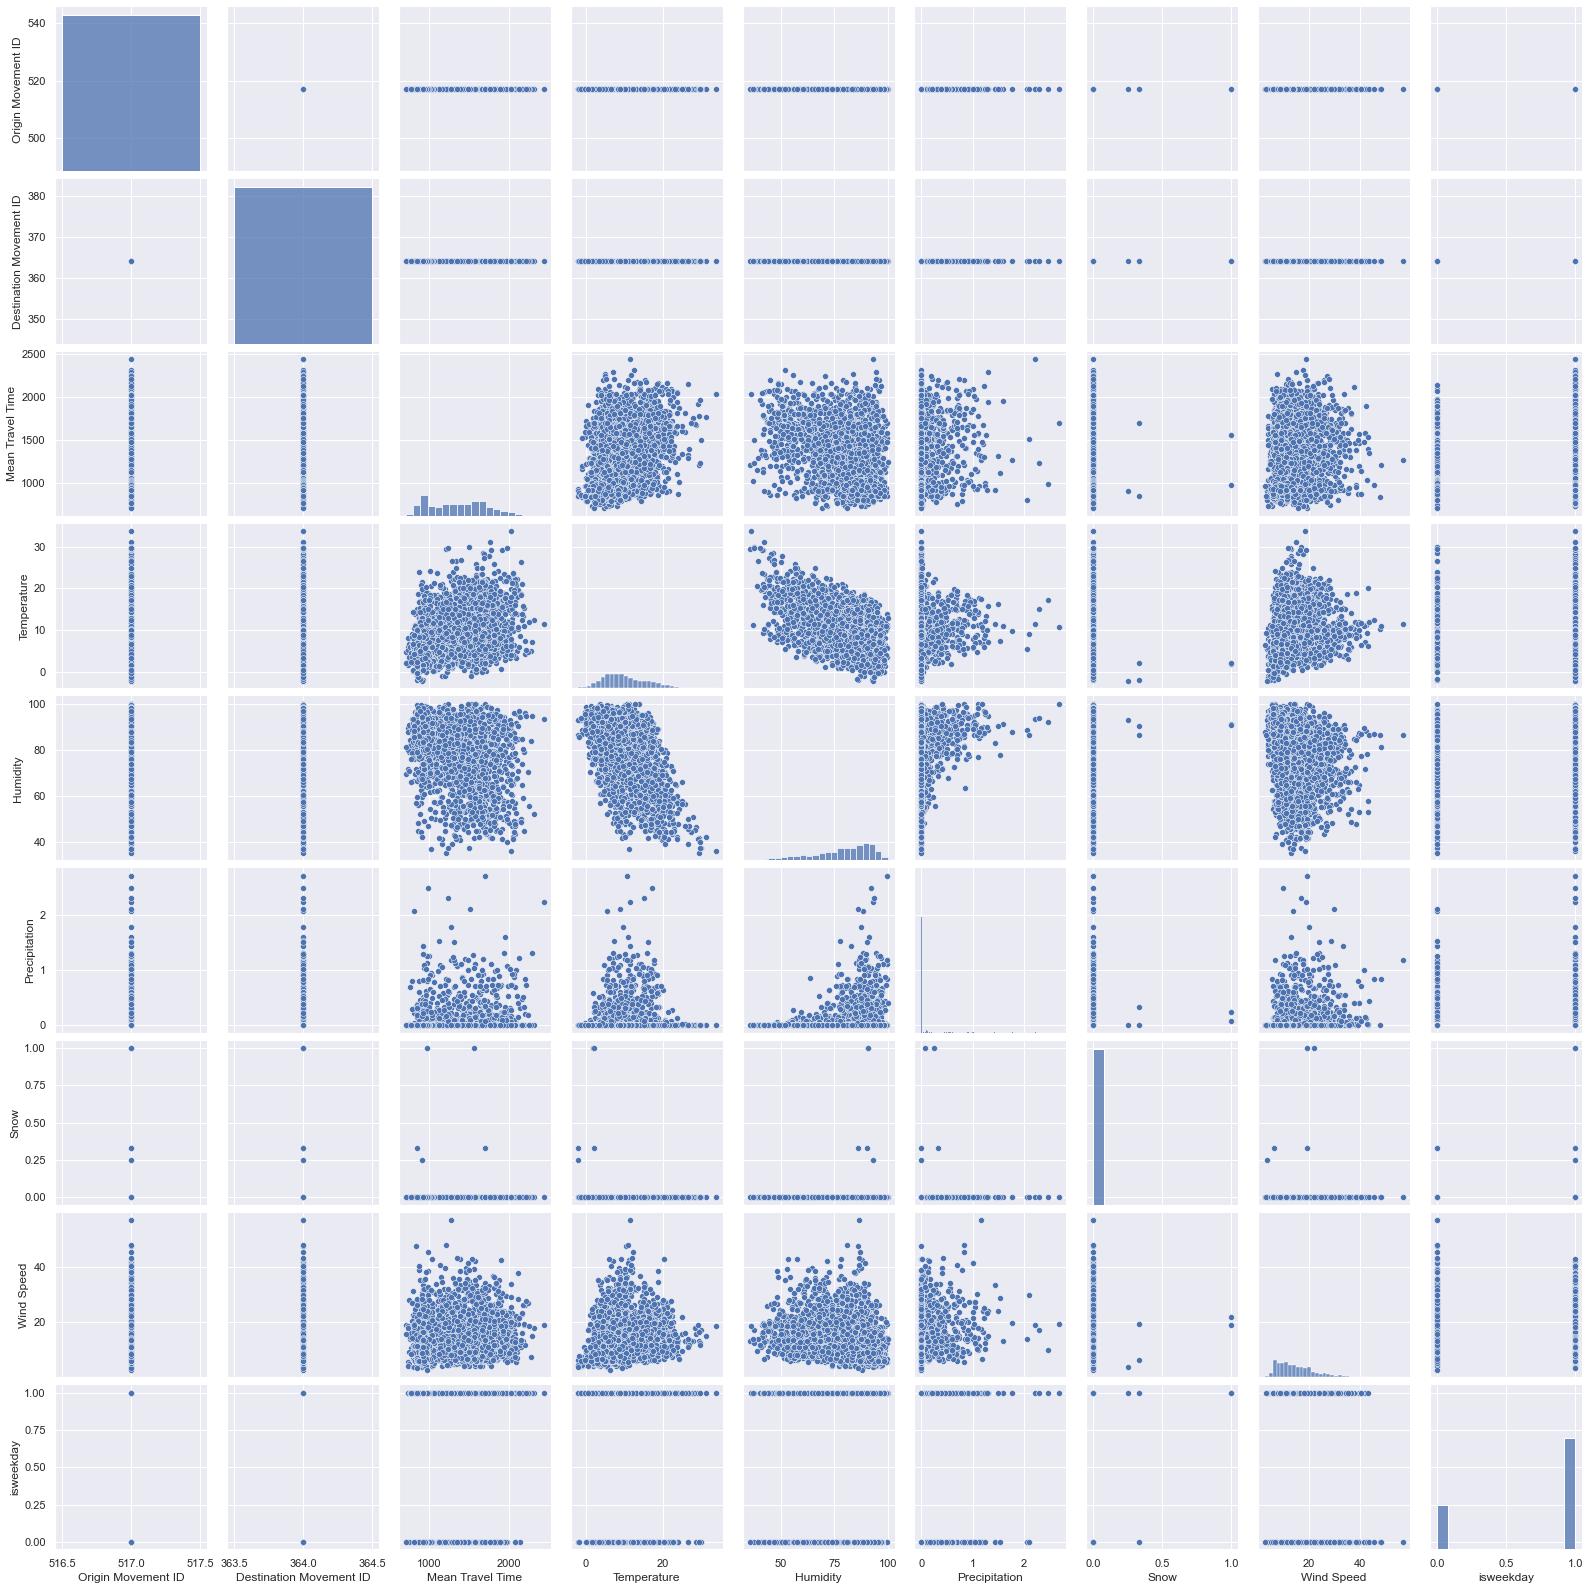

In [66]:
# create pair plots to further see the relationship between one variable to another
sns.pairplot(df)
sns.set(font_scale=1.4) 
# histogram on the diagonal allows us to see the distrbution of a single variable

There seems to be a clear relationship between temperature, humidity, precipitation and mean travel time. 

Overall, there are significant relationships between trip duration and time intervals of a day; weather variables may also be related. 

# 5. Regression

To find out how certain factors can affect trip duration, we include linear and panel regressions. 

### 5.1 OLS Regression

In [41]:
# construct a linear regression model because it is easy to implement and interpret
# results will be robust when there are no outliers

In [42]:
# change column names to fit in ols regression
data = df.rename(columns={'Time Bracket':'Time_Bracket', 'Mean Travel Time':'Mean_Travel_Time', 
                              'Wind Speed':'Wind_Speed', 'Day of Week':'Day_of_Week'})

In [43]:
# dependent variable is the mean travel time on this route
# independent variables are the weather variables and the variable isweekday. 
# As we found that mean travel time varies a lot in different time intervals of a day; to capture the characteristics of each time interval, fixed effect terms are added 
fit = ols(formula='Mean_Travel_Time ~ C(Time_Bracket) + C(isweekday) + Temperature + Humidity + Precipitation + Snow + Wind_Speed',
          data = data).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mean_Travel_Time   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     430.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:44:44   Log-Likelihood:                -15360.
No. Observations:                2275   AIC:                         3.074e+04
Df Residuals:                    2264   BIC:                         3.080e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    938.8828     46.109     20.362      0.000     848.463    1029.303
C(Time_Bracket)[T.Early]    -470.8371     14.165    -33.240      0.000    -498.614    -443.060
C(Time_Bracket)[T.Evening]  -150.2144     13.846    -10.849      0.000    -177.366    -123.062
C(Time_Bracket)[T.Midday]    244.5079     14.652     16.688      0.000     215.776     273.240
C(Time_Bracket)[T.PM]        238.4578     14.100     16.911      0.000     210.807     266.109
C(isweekday)[T.1]            215.9807      9.728     22.203      0.000     196.905     235.057
Temperature                    8.6271      0.967      8.924      0.000       6.731      10.523
Humidity                       2.4962      0.459      5.435      0.000       1.596       3.397
Precipitation                 63.3333     19.587      3.233      0.001      24.922     101.744
Snow                          43.2317    137.945      0.313      0.754    -227.281     313.744
Wind_Speed                     0.1873      0.635      0.295      0.768      -1.058       1.432
==============================================================================
Omnibus:                       21.806   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.434
Skew:                           0.021   Prob(JB):                     3.33e-08
Kurtosis:                       3.601   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The output shows that the coefficients for snow and wind speed are not significant. So we remove the two variables and run the regression again.

In [44]:
fit = ols(formula='Mean_Travel_Time ~ C(Time_Bracket) + C(isweekday) + Temperature + Humidity + Precipitation',
          data = data).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mean_Travel_Time   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     538.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:44:44   Log-Likelihood:                -15360.
No. Observations:                2275   AIC:                         3.074e+04
Df Residuals:                    2266   BIC:                         3.079e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    944.0357     43.124     21.891      0.000     859.469    1028.602
C(Time_Bracket)[T.Early]    -471.2153     14.111    -33.393      0.000    -498.887    -443.543
C(Time_Bracket)[T.Evening]  -150.7209     13.777    -10.940      0.000    -177.738    -123.703
C(Time_Bracket)[T.Midday]    244.8270     14.585     16.786      0.000     216.225     273.429
C(Time_Bracket)[T.PM]        238.1834     14.080     16.917      0.000     210.573     265.794
C(isweekday)[T.1]            215.6532      9.642     22.366      0.000     196.745     234.561
Temperature                    8.5910      0.963      8.924      0.000       6.703      10.479
Humidity                       2.4751      0.454      5.451      0.000       1.585       3.365
Precipitation                 64.7058     19.088      3.390      0.001      27.274     102.138
==============================================================================
Omnibus:                       21.726   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.284
Skew:                           0.020   Prob(JB):                     3.59e-08
Kurtosis:                       3.600   Cond. No.                         821.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared in this regression is 0.655, indicating a good performance of this model and the estimated coefficients are reasonable. 

Result shows that when it is midday (10am-4pm), it takes about 245 seconds longer on this route than in AM (7am-10am). And it takes 471 seconds shorter when it is early(0am-7am), with other conditions controlled.  In addition, travel time on weekdays is about 216 seconds longer than on weekends.  

If we only look at the impact of weather, rain is the most important factor that will affect the travel time. At the same time of the same day, 1 millimetre's increase in precipitation can lead to about 65 seconds' delay on this route. Higher temperature and humidity will also cause longer travel time, but not that noteworthy as precipitation.  


This suggests that the time of day and if it is weekday are indeed the reasons for the deviation of travel time, as shown in  previous graphs. Besides, precipitation is also an important factor that affects the travel time, which is not obvious by previous graphs.

### 5.2 Panel Regression

In [45]:
# run panel regrression to include the potential time effect

In [46]:
data['Date'] = pd.to_datetime(data['Date'])

In [47]:
data_p = data.set_index(['Time_Bracket','Date'])

In [48]:
dep = data_p['Mean_Travel_Time']
indep_vars = ['Temperature','Humidity','Precipitation','Snow','Wind_Speed','isweekday']
indep = sm.add_constant(data_p[indep_vars])
model = PanelOLS(dep, indep, entity_effects=True, time_effects=True,drop_absorbed=True)
results = model.fit(cov_type='clustered', cluster_entity=True)
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:       Mean_Travel_Time   R-squared:                        0.0030
Estimator:                   PanelOLS   R-squared (Between):              0.0367
No. Observations:                2275   R-squared (Within):               0.0213
Date:                Tue, Mar 16 2021   R-squared (Overall):              0.0299
Time:                        13:44:45   Log-likelihood                -1.471e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.3658
Entities:                           5   P-value                           0.2435
Avg Obs:                       455.00   Distribution:                  F(4,1812)
Min Obs:                       455.00                                           
Max Obs:                       455.00   F-statistic (robust):             11.151
                            

Results shows that among all the weather variables, only precipitation is significant. This conclusion is consistent with the OLS regression. However, considering that the R-squared here is only 0.0034, it is hard to say that including time effect is appropriate. So we won't take time effect into account and the result in ols regression will be used.

The problem with the panel regression is that the variable isweekday does not change much over time. It is absorbed into the fixed effects and we cannot estimate its impact in this regression. But since we already saw the approximate effect of isweekday in the previous regression, we can focus on the weather variables here.

# 6. SARIMA Model

In [49]:
#We use the daily data because time series problems require that data observations have consistent intervals.
data_train=df_daily.iloc[:365,:] #get the training data 
#start_date: 2019-01-01
#end_date: 2019-12-31
data_train.head()

,Date,Temperature,Humidity,Precipitation,Snow,Wind Speed,Mean Travel Time
0,2019-01-01,7.162,80.492,0.0,0.0,10.318,1219.0
1,2019-01-02,3.536,78.816,0.0,0.0,7.150,1158.4
2,2019-01-03,2.036,85.894,0.0,0.0,5.134,1116.6
3,2019-01-04,0.368,86.800,0.0,0.0,5.618,1188.6
4,2019-01-05,2.394,85.352,0.0,0.0,7.776,1124.8


In [50]:
data_train.tail() 

,Date,Temperature,Humidity,Precipitation,Snow,Wind Speed,Mean Travel Time
360,2019-12-27,6.268,94.500,0.0,0.0,8.382,1160.6
361,2019-12-28,6.788,94.382,0.0,0.0,9.092,1197.4
362,2019-12-29,5.610,89.590,0.0,0.0,11.082,1274.6
363,2019-12-30,6.156,90.702,0.0,0.0,11.298,1160.2
364,2019-12-31,6.208,93.784,0.0,0.0,11.602,1183.6


## 6.1 Plotting the dataset

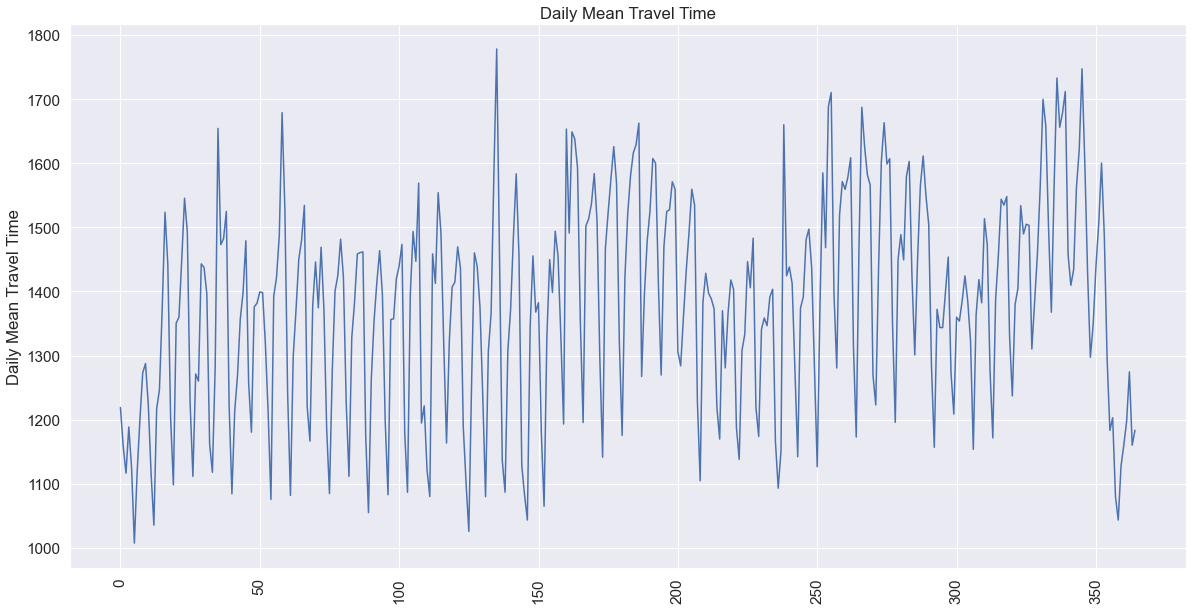

In [51]:
plt.figure(figsize=[20, 10]); # Set dimensions for figure
plt.plot(data_train['Mean Travel Time']) #set data
plt.title('Daily Mean Travel Time') #set title
plt.ylabel('Daily Mean Travel Time') #set label for y axis
plt.xticks(rotation=90) #rotate the x axis
plt.grid(True) #add the grid
plt.show()

To test if the data is stationery, we use the Augmented Dickey-Fuller test (Cheung & Lai, 1995).

In [52]:
ad_fuller_result = adfuller(data_train['Mean Travel Time']) #select the data to test
print(f'ADF Statistic: {ad_fuller_result[0]}') #print the test-stats
print(f'p-value: {ad_fuller_result[1]}') #print the p-value

ADF Statistic: -3.72094464856702
p-value: 0.0038280104557407


Here, the p value is less than 0.01, meaning that we can reject the null hypothesis and assume that the data is stationery. 

## 6.2 Plotting the ACF and PACF

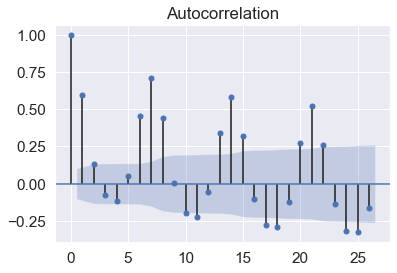

In [53]:
plot_acf(data_train['Mean Travel Time']);

We observe significant spikes at lag 1,7,14 and 21 in the ACF above, suggesting a seasonal moving average (MA) process.

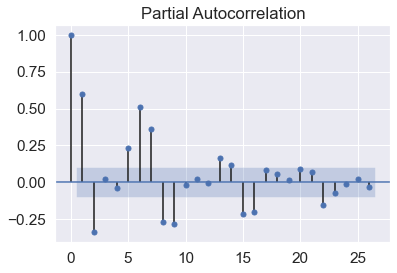

In [54]:
plot_pacf(data_train['Mean Travel Time']);

The PACF plot has similar exponential behaviour, suggesting a seasonal Autoregressive  (AR). 

So, for this dataset we can use the Seasonal Autoregressive Integrated Moving Average (SARIMA) Model: 
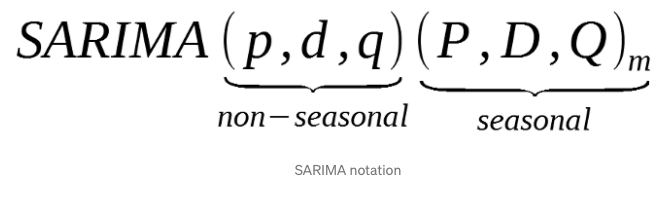

In [55]:
# p, d, q stands for the order of AR, Differencing, and MA respectively
# m represents the seasonality
# the capitalized p, d, q stand for their seaonal parts.
# Considering that we don't take the log-difference, the value is zero for the d and D.

Although these plots can give us a rough idea of the processeses, it's better to test multiple scenarios and choose the model that yields the lowest Akaike’s Information Criterion (AIC) (Akaike, H., 1973). Thus, we will compute the different combinations of orders; hence fit a SARIMA model with those orders, and referring the AIC for the order selection.
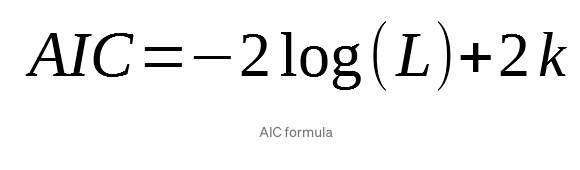

## 6.3 Selecting the Appropriate Order (p,q,P,Q) of a SARIMA Model 

In [56]:
#define a function that will test all orders for us using AIC (Macro, 2020)
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    #model selection
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic 
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [57]:
# Hence, we generate all possible parameters combinations for (p,d,q) and (P,D,Q):
p = range(0, 4, 1) #set range for AR
d = 0
q = range(0, 4, 1) #set range for MA

P = range(0, 4, 1) #set range for seasonal AR
D = 0
Q = range(0, 4, 1) #set range for seasonal MA
s = 7
parameters = product(p, q, P, Q) #generating the parameter combinations
parameters_list = list(parameters)
print(len(parameters_list))

256


Now, we have 256 combinations of all those parameters. Then, the AIC will test 256 different SARIMA models on the mean travel time to find the one with the lowest AIC:

In [58]:
result_AIC = optimize_SARIMA(parameters_list, 0, 0, 7, data_train['Mean Travel Time']) #testing each combination of parameters
result_AIC

,"(p,q)x(P,Q)",AIC
0,"(2, 1, 1, 1)",4288.311543
1,"(1, 2, 1, 1)",4289.835905
2,"(3, 1, 1, 1)",4290.351962
3,"(1, 3, 1, 1)",4290.750021
4,"(3, 1, 2, 1)",4291.237285
...,...,...
241,"(0, 1, 0, 0)",5854.400787
242,"(0, 3, 3, 2)",5858.836011
243,"(0, 0, 0, 1)",5886.924285
244,"(0, 3, 3, 3)",5924.167533


## 6.4 Estimating the Best Model

From the table above we find the model parameters (2,0,1) (1,0,1)  produces the lowest AIC, thus we can now estimate our SARIMA model.

In [59]:
best_model = SARIMAX(data_train['Mean Travel Time'], order=(2, 0, 1), seasonal_order=(1, 0, 1, 7)).fit(dis=-1) #input the selected best parameters to the SARIMA model
print(best_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                  Mean Travel Time   No. Observations:                  365
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2138.156
Date:                           Tue, 16 Mar 2021   AIC                           4288.312
Time:                                   13:49:48   BIC                           4311.711
Sample:                                        0   HQIC                          4297.611
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2961      0.075     17.336      0.000       1.150       1.443
ar.L2         -0.3080      0.069     -4.483

According to the summary above, all parameters are statistically significant at 1%. 

Finally, to test if the residuals will be white noise, with no autocorrelation, we use the Ljung-Box test and the hypotheses are as follows:

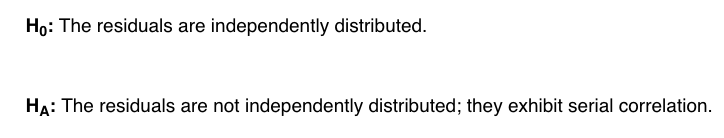

In [60]:
ljung_box, p_value = acorr_ljungbox(best_model.resid) 
print(f'Ljung-Box test: {ljung_box[:7]}') #set the number of lags to test and print the test-stats
print(f'p-value: {p_value[:7]}') #print the p-values for the number of las

Ljung-Box test: [0.06305875 0.11116535 0.23508777 2.26849306 3.89153054 3.93766782
 4.75030681]
p-value: [0.80172519 0.94593382 0.97173551 0.68651112 0.56513635 0.68511147
 0.69040372]


Looking at the p-values above, we can see that they are above 0.01. Therefore, we fail to reject the null hypothesis; therefore we can assume that the residuals are not correlated.


## 6.4 Diagnosing the Model Residuals

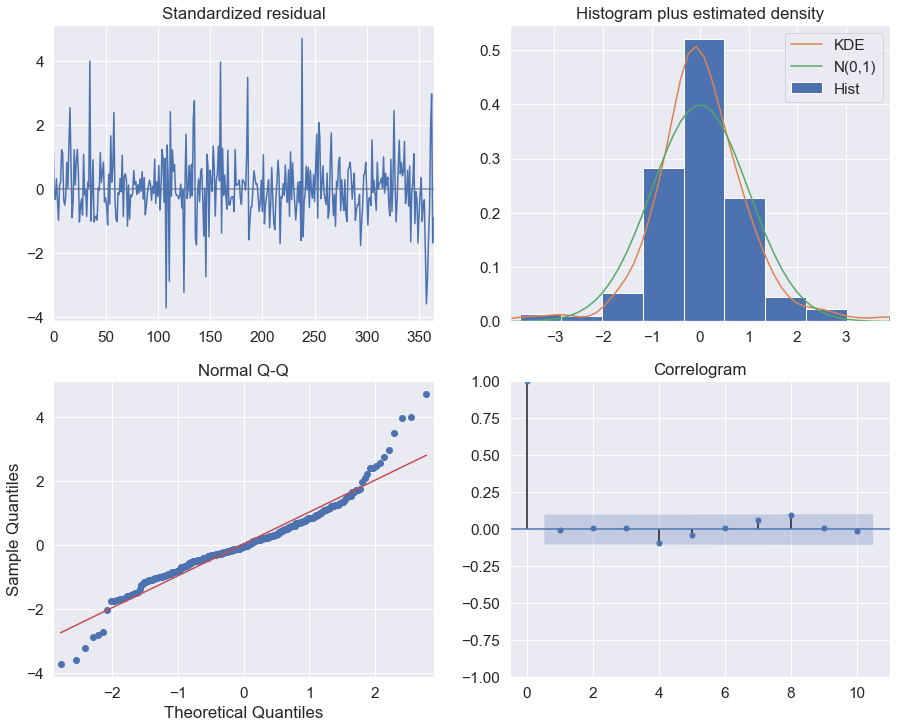

In [61]:
best_model.plot_diagnostics(figsize=(15,12)); #plotting the diagnostics for our best model

The density plot shows that the residuals follow normal distribution and the QQ plot also implies that residuals follow normal distribution since the line is approximately linear. Hence, from the standardized residual plot, the residuals don't seem to have a seasonal pattern but more likely to be white noise. The Correlogram further proves that there is no autocorrelation but white noise. 

## 6.5 Plotting the Predictions of the Models and Forecasting

## The Best SARIMA Model:

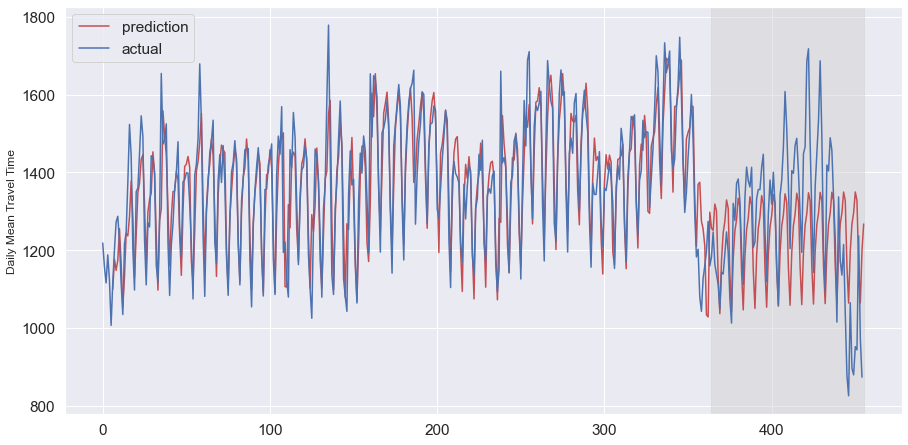

In [62]:
#preparing the values for prediction
data_train['arima_model'] = best_model.fittedvalues
data_train['arima_model'][:5+1] = np.NaN #5+1 dropped for degree of freedom since we have 5 model estimators

forecast = best_model.predict(start=data_train.shape[0], end=data_train.shape[0] + 90)#forecast the 1st quarter of 2020
forecast = data_train['arima_model'].append(forecast)

#setting up the plot
plt.figure(figsize=(15, 7.5)) 
plt.plot(forecast, color='r', label='prediction') 
plt.axvspan(data_train.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(df_daily['Mean Travel Time'], label='actual')
plt.ylabel('Daily Mean Travel Time', fontsize=12) #set label for y axis
plt.legend()

plt.show()

From above we can see that the model fits well; however, the model fails to capture unexpected shocks in travel mean time, e.g., the huge decline around day 450 (March 2020) which could be the result of the lockdown and the pandemic.

## 6.6 Is the Best-Fitted Model the Best Model?
We also find the best-fitted model as shown below; however it seems that there is a problem of overfitting.

                                     SARIMAX Results                                      
Dep. Variable:                   Mean Travel Time   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 13)   Log Likelihood               -2335.055
Date:                            Tue, 16 Mar 2021   AIC                           4680.109
Time:                                    13:49:50   BIC                           4699.609
Sample:                                         0   HQIC                          4687.859
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9982      0.003    321.608      0.000       0.992       1.004
ma.L1          0.1070      0.061   

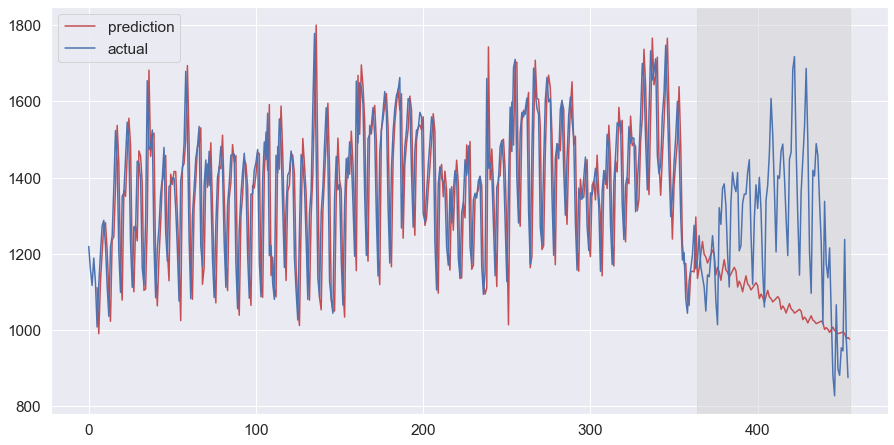

In [63]:
#input the parameters for the best-fitted SARIMA model
best_model = SARIMAX(data_train['Mean Travel Time'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 13)).fit(dis=-1)
print(best_model.summary())

#preparing the values for prediction
data_train['arima_model'] = best_model.fittedvalues
data_train['arima_model'][:4+1] = np.NaN #4+1 dropped for degree of freedom since we have 4 model estimators


forecast = best_model.predict(start=data_train.shape[0], end=data_train.shape[0] + 90)#forecast the 1st quarter of 2020
forecast = data_train['arima_model'].append(forecast)

#setting up the plot
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='prediction')
plt.axvspan(data_train.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(df_daily['Mean Travel Time'], label='actual')
plt.legend()

plt.show()

Therefore, we can see that the forecast here is problematic, and we also learn that the best-fitted model is not necessarily the best forecasting model.

# 7. Conclusion

### 7.1 Summary

Through our data visualization, OLS, and SARIMA model, we were able to explore the effects of certain factors on the mean travel time of Uber trips from King’s Cross St. Pancras to Westminster. The OLS explored the weekend/weekday-effect, the effects of time-brackets, as well as weather patterns, such as temperature, humidity, precipitation, snow, and windspeed, on the mean travel time through a multivariate analysis. On the other hand, the SARIMA model was utilized for univariate time series forecasting which uncovered hidden patterns, such as seasonality, regardless of any unexpected events or factors, through time, that relates to the changes in mean travel times. 

As we focused on variations in trip duration (i.e. the mean travel time), the patterns found are in line with Uber’s pricing strategies. More specifically, we found that there are seasonal variations that underlie the changes in mean travel times, and we found that bad weather may increase the duration of the trip, and that the busiest days, or hours, may also increase the duration of the trip; these patterns are reflected by Uber’s pricing strategies as consumers would expect the price to increase or decrease based on the condition of such factors.

### 7.2 Strengths and Limitations

The strength of our analyses includes our utilization of the SARIMA model, which has a high commercial value; time series forecasting is applicable for any business, such as Uber, in order to optimize planning and operations. However, our analyses are not without limitations. The first limitation is that the analyses are based on mean travel times, as the limited data from Uber Movement was not on an hourly basis, rather, an unequal-interval time-brackets. Hourly data would have provided us with more accuracy and bring more insights in terms of optimization. The analyses may also be extended to include more variables in the dataset, to include more factors that may affect mean travel time, such as in the OLS in order to prevent omitted variable bias; which may have been the case due to limited data. Furthermore, we had only included 15-months’ worth of data due to computational limitations; additional data would provide a larger sample that would have increased the power of the results. 

# References

Cheung, Y.-W. & Lai, K.S., 1995. Lag order and critical values of the augmented Dickey–Fuller test. Journal of Business & Economic Statistics, 13(3), pp.277–280.

Macro Peixeiro, 2020. Time Series Forecasting with SARIMA in Python. Towards Data Sicence. Medium. Avaliable at https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b.

Akaike, H., 1973. Information theory and an extension of the maximum likelihood principle. In B. N. Petrov & B. F. Csaki (Eds.),Second International Symposium on Information Theory, (pp. 267–281). Academiai Kiado: Budapest.